

> **Name :** Gayatri Bajirao jadhav

> **Domain :** Data Science

> **Project :** Google EDA


> **Questions :**
1. The app which is downloaded many times and ratings of that app is >4.5
2. Which app categories have the highest number of installations?
3. What is the distribution of app ratings across different categories?
4. Is there a correlation between the size of an app and its rating?
5. How do paid apps compare to free apps in terms of ratings and installations?
6. What are the top 5 apps with the highest number of reviews?











In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.columns    #list all columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.describe()   #Describe Statistical values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dtypes


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df.shape

(10841, 13)



> **1. The app which is downloaded many times and ratings of that app is >4.5?**



In [ ]:
df['Installs'] = pd.to_numeric(df['Installs'])

high_installs_apps = df[df['Installs'] > 1000000]
high_rated_apps = high_installs_apps[high_installs_apps['Rating'] > 4.5]

top_app = high_rated_apps.nlargest(5, 'Installs')

print("App with many installations and ratings >4.5:")
top_app[['Installs', 'Rating']]


App with many installations and ratings >4.5:


,Installs,Rating
App,,
Google Duo - High Quality Video Calls,500000000.0,4.6
SHAREit - Transfer & Share,500000000.0,4.6
Clean Master- Space Cleaner & Antivirus,500000000.0,4.7
Google Duo - High Quality Video Calls,500000000.0,4.6
SHAREit - Transfer & Share,500000000.0,4.6




> **2. Which app categories have the highest number of installations?**






In [ ]:
df[['Category', 'Installs']]

,Category,Installs
0,ART_AND_DESIGN,"10,000+"
1,ART_AND_DESIGN,"500,000+"
2,ART_AND_DESIGN,"5,000,000+"
3,ART_AND_DESIGN,"50,000,000+"
4,ART_AND_DESIGN,"100,000+"
...,...,...
10836,FAMILY,"5,000+"
10837,FAMILY,100+
10838,MEDICAL,"1,000+"
10839,BOOKS_AND_REFERENCE,"1,000+"


In [ ]:
High_installs = df.groupby('Category')['Installs'].max()
High_installs


Category
1.9                            Free
ART_AND_DESIGN             500,000+
AUTO_AND_VEHICLES          500,000+
BEAUTY                     500,000+
BOOKS_AND_REFERENCE        500,000+
BUSINESS                   500,000+
COMICS                     500,000+
COMMUNICATION          500,000,000+
DATING                     500,000+
EDUCATION                  500,000+
ENTERTAINMENT              500,000+
EVENTS                     500,000+
FAMILY                 500,000,000+
FINANCE                    500,000+
FOOD_AND_DRINK             500,000+
GAME                   500,000,000+
HEALTH_AND_FITNESS     500,000,000+
HOUSE_AND_HOME             500,000+
LIBRARIES_AND_DEMO         500,000+
LIFESTYLE                  500,000+
MAPS_AND_NAVIGATION        500,000+
MEDICAL                    500,000+
NEWS_AND_MAGAZINES     500,000,000+
PARENTING                  500,000+
PERSONALIZATION            500,000+
PHOTOGRAPHY                500,000+
PRODUCTIVITY           500,000,000+
SHOPPING           



> **3. What is the distribution of app ratings across different categories?**



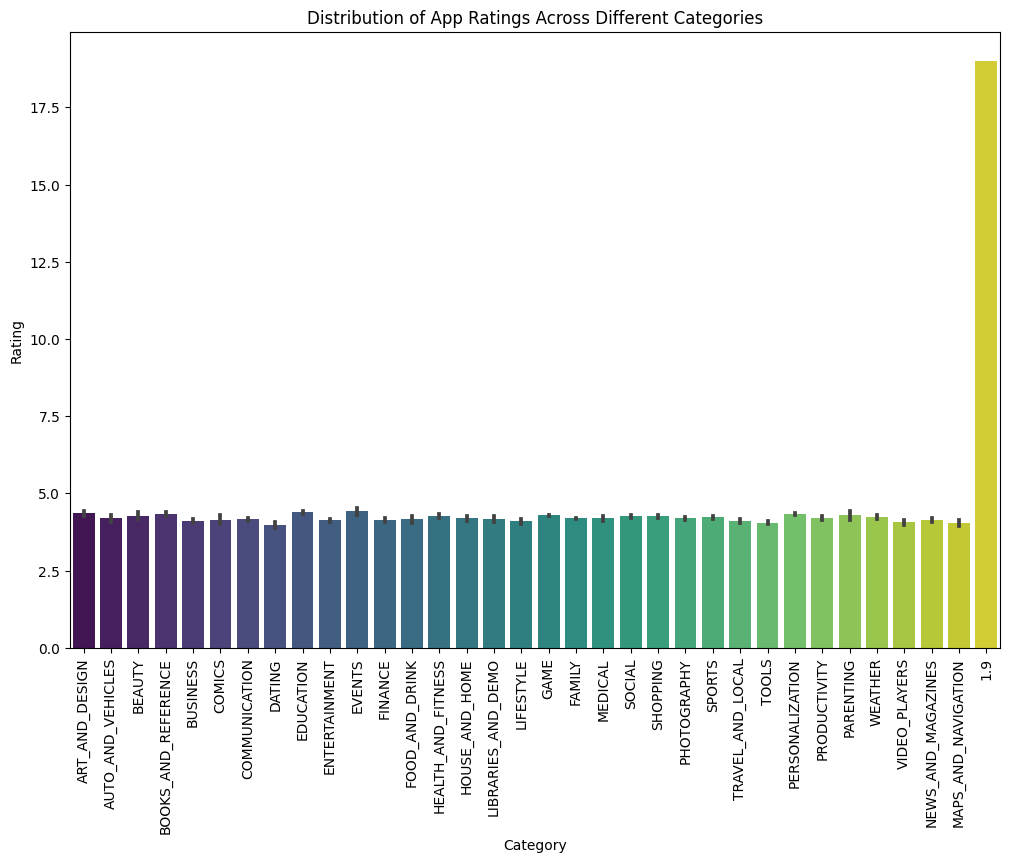

In [ ]:
# distribution of app ratings across categories using Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Rating', data=df, palette='viridis')
plt.title('Distribution of App Ratings Across Different Categories')
plt.xticks(rotation=90)
plt.show()




> **4. Is there a correlation between the size of an app and its rating?**



Correlation coefficient between Size and Rating :  0.0757881432183287


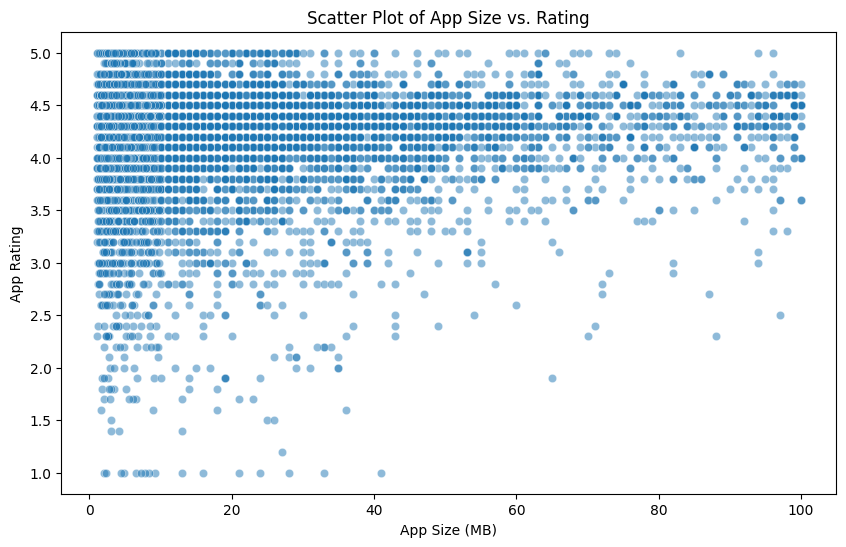

In [ ]:
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')

# Drop rows with missing values in 'Size' or 'Rating' columns
df = df.dropna(subset=['Size', 'Rating'])

# Calculate the correlation coefficient
corr_coeff = df['Size'].corr(df['Rating'])
print("Correlation coefficient between Size and Rating : " ,corr_coeff)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.5)   # parameter alpha = 0.5 allowing you to visualize overlapping points more easily.
plt.title('Scatter Plot of App Size vs. Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('App Rating')
plt.show()




> **5. How do paid apps compare to free apps in terms of Ratings?**



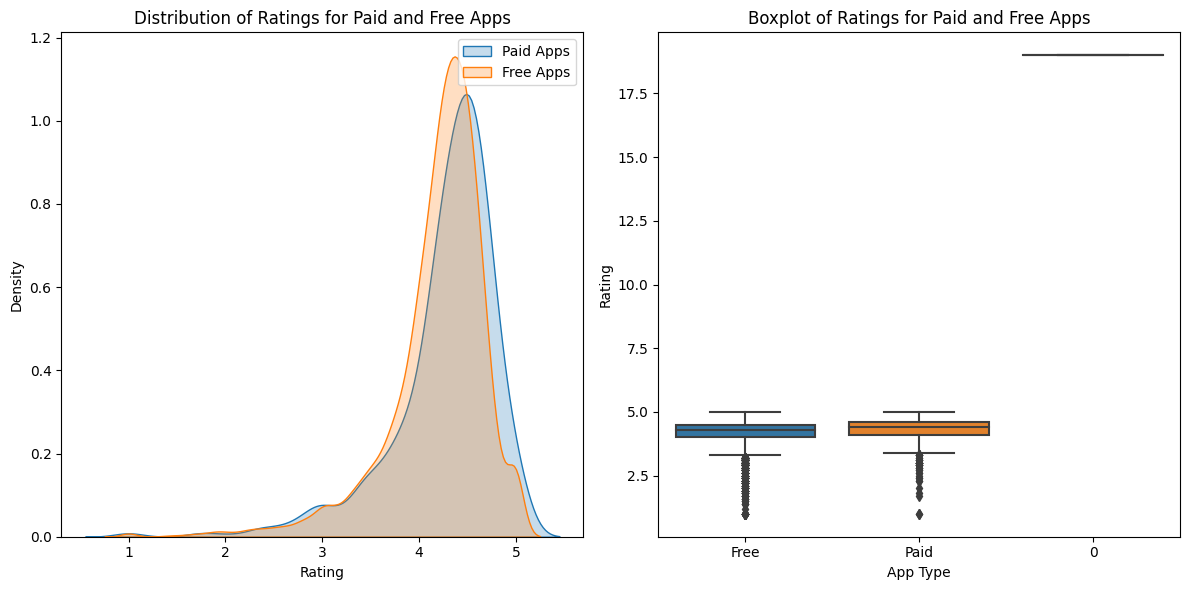

In [ ]:
# Filter data for paid and free apps
paid_apps = df[df['Type'] == 'Paid']
free_apps = df[df['Type'] == 'Free']

# Filter data for paid and free apps
paid_apps = df[df['Type'] == 'Paid']
free_apps = df[df['Type'] == 'Free']

plt.figure(figsize=(12, 6))

# Kernel Density Plot (KDE)
plt.subplot(1, 2, 1)
sns.kdeplot(paid_apps['Rating'], label='Paid Apps', fill=True)
sns.kdeplot(free_apps['Rating'], label='Free Apps', fill=True)
plt.title('Distribution of Ratings for Paid and Free Apps')
plt.xlabel('Rating')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('Boxplot of Ratings for Paid and Free Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()





> **6. What are the top 5 apps with the highest number of reviews?**



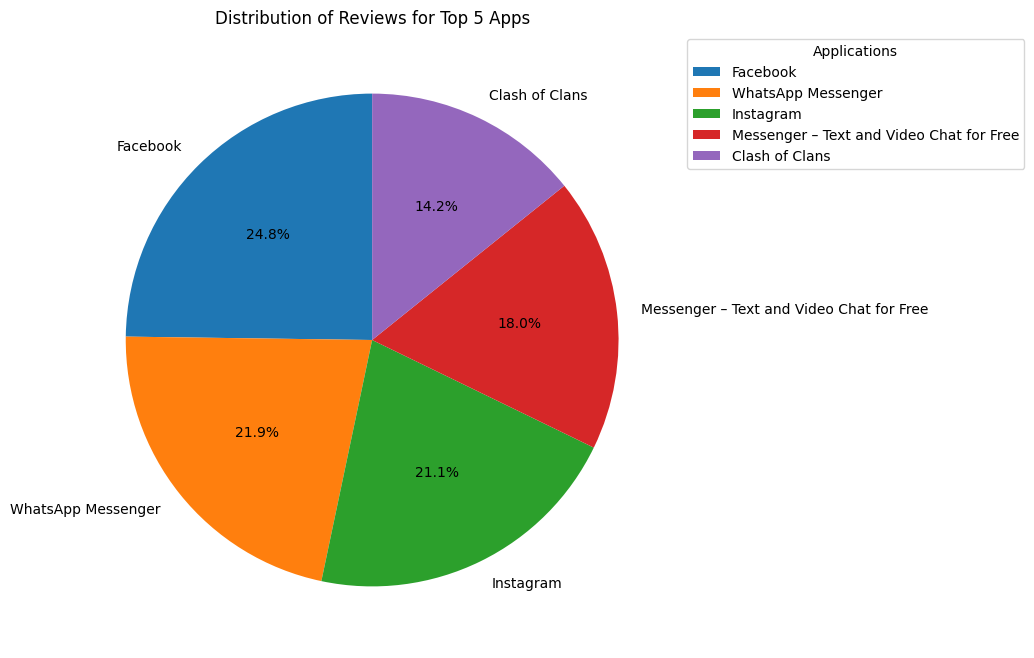

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

top_apps = df.sort_values(by='Reviews', ascending=False).drop_duplicates('App').head(5)

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_apps['Reviews'], labels=top_apps['App'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Reviews for Top 5 Apps')
plt.legend(title='Applications', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
